<a href="https://colab.research.google.com/github/byruzyayandy1/Visualization_Maths_Results/blob/master/Visualization_Maths_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.plotly as py 
import plotly as pl
import plotly.figure_factory as ff
import plotly.graph_objs as go
data = pd.read_csv('StudentsPerformance.csv')
pl.tools.set_credentials_file(username='byruzyayandy', api_key='dwJ7oTmaA2DH5yjxlHUZ')

The dataset I chose for this assignment was found on kaggle(https://www.kaggle.com/spscientist/students-performance-in-exams).  It contains 1000 exam scores and some background infromation on those students. Does the students parent's level of education affect the math exam scores? Is there a significant difference of math scores between the genders?
 





CLEANING of DATA

In [0]:
data.head()

#KEY for qualitative variables

# MALE = 1  & Female = 0       completed = 1      none = 0
# group a = 1       some highschool = 0
# group b = 2       highschool = 1
# group c = 3       some college = 2 
# group d = 4       associates = 3
# group e = 5       bachelors = 4
#                   masters = 5


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
data = data.replace(to_replace='group A', value=1)
data = data.replace(to_replace='group B', value=2)
data = data.replace(to_replace='group C', value=3)
data = data.replace(to_replace='group D', value=4)
data = data.replace(to_replace='group E', value=5)


In [0]:
data.head()
data = data.replace(to_replace='female', value=0)
data = data.replace(to_replace='male', value=1)


In [0]:
data['parental level of education'].unique()
data = data.replace(to_replace='some high school', value=0)
data = data.replace(to_replace='high school', value=1)
data = data.replace(to_replace="some college", value=2)
data = data.replace(to_replace="associate's degree", value=3)
data = data.replace(to_replace="bachelor's degree", value=4)
data = data.replace(to_replace="master's degree", value=5)

In [0]:
data.lunch.unique()
data = data.replace(to_replace='standard', value=1)
data = data.replace(to_replace='free/reduced', value=0)


In [0]:
data['test preparation course'].unique()
data = data.replace(to_replace='completed', value=1)
data = data.replace(to_replace='none', value=0)


In [0]:
org = data
df = data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,4,1,0,72,72,74
1,0,3,2,1,1,69,90,88
2,0,2,5,1,0,90,95,93
3,1,1,3,0,0,47,57,44
4,1,3,2,1,0,76,78,75


In [0]:
import plotly.plotly as py
import plotly.figure_factory as ff

In [0]:
trace1 = go.Splom(dimensions=[dict(label='Math Scores', 
                                 values=df['math score']),
                             dict(label='Parent Lvl of Ed', 
                                 values=df['parental level of education']),
                             dict(label='Writing Score', 
                                 values=df['writing score']),
                             dict(label='Gender', 
                                 values=df['gender'])],
                             
                    marker =dict(size=7,
                                showscale=False,
                                line=dict(width=0.5,
                                           )))
axis =dict(showline=True,
         zeroline=False,
         gridcolor='#fff',
         ticklen=4)

In [0]:
layout =go.Layout(
    title = 'Student Exam Scores : Math',
    dragmode='select',
    width=600,
    height=600,
    autosize=False,
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240,0.95)',
    xaxis1=dict(axis),
    xaxis2=dict(axis),
    xaxis3=dict(axis),
    xaxis4=dict(axis),
    yaxis1=dict(axis),
    yaxis2=dict(axis),
    yaxis3=dict(axis),
    yaxis4=dict(axis)
)

fig1 = dict(data=[trace1], layout=layout)

url1 = py.plot(fig1, filename='Splom-Scores', auto_open=False)

py.iplot(fig1, filename='Splom-Scores')

/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [0]:
url1

'https://plot.ly/~epete358/2'

In [0]:
_0_ = df[df['parental level of education']==0]
_1_ = df[df['parental level of education']==1]
_2_ = df[df['parental level of education']==2]
_3_ = df[df['parental level of education']==3]
_4_ = df[df['parental level of education']==4]
_5_ = df[df['parental level of education']==5]

trace0 = go.Box(y=_0_,
               name='Some HS')
trace1 = go.Box(y=_1_,
               name='HS')
trace2 = go.Box(y=_2_,
               name='Associate')
trace3 = go.Box(y=_3_,
               name='Some College')
trace4 = go.Box(y=_4_,
               name='Bachelors')
trace5 = go.Box(y=_5_,
               name='Masters')

data = [trace0,trace1,trace2,trace3,trace4,trace5]

layout = go.Layout(title="Exam Scores Based on Parent's Level of Education")

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="BoxPlotforParEdu")


/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [0]:
male = df[df['gender']==1]
female = df[df['gender']==0]

trace1 = go.Bar(
            x=["Female"],
            y=[female['math score'].mean()],
            name="Female"
)
trace2 = go.Bar(
            x=[ 'Male'],
            y=[male['math score'].mean()],
            name='Male'
)
layout = go.Layout(
            title="Average Math Exam Scores For Each Gender")
data1 =[trace1, trace2]
fig = go.Figure(data=data1, layout=layout)

url3 = py.iplot(fig, filename='Male Vs Female Math Scores-Bar')

/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [0]:
male = org[org['gender']==1]
female = org[org['gender']==0]


hist_data = [female['math score']]
group_labels = ['Female Scores']

fig = ff.create_distplot(hist_data, group_labels)
fig['layout'].update(title='Distribution of Female Math Scores')

url4 = py.plot(data, filename='Female Math Scores', auto_open=False)
py.iplot(fig, filename='Female Math Scores')

/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [0]:


hist_data = [male['math score']]
group_labels = ['Male Scores']

fig = ff.create_distplot(hist_data, group_labels)
fig['layout'].update(title='Distribution of Male Math Scores')

url5 = py.plot(data, filename='Male Math Scores', auto_open=False)
url5 = py.iplot(fig, filename='Male Math Scores')

/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### The visualizations suggest there is relationship between level of education of the parents and their childrens math exam scores.  Although not a sizeable difference, males seem to score higher on their math exams on average.  




# Dimensionality Reduction



In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [0]:
x = org[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score',
       'writing score']]
x = StandardScaler().fit_transform(x)

/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



In [0]:
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pca.explained_variance_ratio_
pcDF = pd.DataFrame(data=pc, columns=['pc1', 'pc2'])

In [0]:
pcDF['math score'] = org['math score']

pcDF.head()

,pc1,pc2,math score
0,-0.678974,0.661588,72
1,-2.381472,-0.940021,69
2,-2.563142,0.959834,90
3,2.405414,0.392110,47
4,-0.330433,-0.295413,76


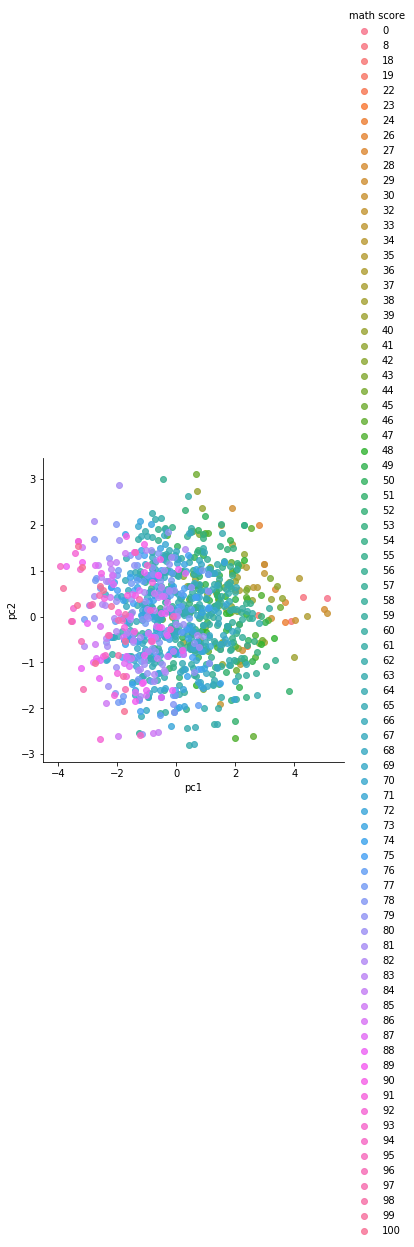

In [0]:
sns.lmplot(x='pc1', y='pc2', hue='math score', data=pcDF, fit_reg=False)


In [0]:
import plotly.dashboard_objs as dashboard

import IPython.display
from IPython.display import Image

my_dboard = dashboard.Dashboard()


In [0]:

box_a = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': "epete358:2",
    'title': 'Scatter Plot Matrix '
}
box_b = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': "epete358:17",
    'title': 'BoxPlot - Parental Level of Education'
}
box_c = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': "epete358:22",
    'title': 'Distribution of Math Scores for Males'
}
box_d = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': "epete358:24",
    'title': 'Distribution of Math Scores for Females'
}
box_e = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': "epete358:19",
    'title': 'Bar Chart - Male and Female Math Scores'
}
                      




In [0]:
my_dboard.insert(box_b)
my_dboard.get_preview()

In [0]:
my_dboard.insert(box_e, 'below', 1)

In [0]:
my_dboard.insert(box_a, 'left', 1)

In [0]:
my_dboard.insert(box_d, 'right', 3, fill_percent=65)

PlotlyError: Your box_id must be a number in your dashboard. To view a representation of your dashboard run get_preview().

In [0]:
my_dboard.insert(box_c, 'below', 4)

In [0]:
my_dboard['settings']['title'] = 'Visualizations for Math Test Scores'


In [0]:
py.sign_in('epete358', 'WaYNnSbvaKPMpMni0QEs')

In [0]:
py.dashboard_ops.upload(my_dboard, 'Visualizations for Math Test Scores')

In [0]:
# Link for Dashboard https://plot.ly/~byruzyayandy/7/visualizations-for-math-test-scores/